## Properties of Point Estimates
Мы хотим, чтобы наши оценки обладали следующими свойствами:
* __несмещённость__ (unbiased) (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (consistent) (при бесконечном расширении выборки мы приходим к истинному значению)
* __эффективность__ (efficient) (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

### Unbiased estimates <br/>
__Определение:__  Оценка $\hat{\theta}$ параметра $\theta$ называется __несмещённой,__ если $\mathbb{E} (\hat{\theta}) = \theta$.

- Bias definition:
\begin{equation}
    bias(\hat{\theta}) = E(\hat{\theta})-\theta
\end{equation}

> Несмещённость это свойство оценки при фиксированном размере выборки $n$. Оно означает, что ошибка "в среднем", то есть при систематическом использовании оценки, отсутствует. Это довольно хорошее свойство, но не обязательное. Достаточно, чтобы смещение оценки уменьшалось с ростом объёма выборки. Такая оценка называется асимптотически несмещённой. 

### Consistent estimates <br/>
__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __состоятельной,__ если $\hat \theta \to \theta$ по вероятности при росте $n$. 

> Нельзя путать состоятельности и несмещённость. Состоятельность означает, что мы при расширении выборки приходим к истине. Несмещённость, что мы при фиксированном размере выборке в среднем не ошибаемся. Состоятельность это то свойство оценки, за которое стоит бороться. Без этого свойства нет никакого смысла использовать оценку. 

### Efficient estimates <br/>
Предположим, что у нас есть две оценки. Они обе классные, несмещённые и состоятельные. Возникает вопрос: а какую взять то? Для того, чтобы выбрать, вводят свойство эффективности. 

__Определение:__ Оценка $\hat \theta$ параметра $\theta$ называется __эффективной в некотором классе оценок,__ если её дисперсия, $Var(\hat \theta)$ в этом классе оценок, при заданном объёме выборке минимальна. 

Зачем это нужно? Для того, чтобы доверительные интервалы для оценок были как можно уже, то есть для того, чтобы оценка была как можно точнее.

#### Две оценки

У нас есть выборка $x_1, \ldots, x_n \sim iid \hspace{2mm} U[0; \theta]$. Мы оценили параметр $\theta$ двумя способами. Методом моментов и методом максимального правдоподобия: 


$$\hat \theta_{MM} = 2 \bar x, \qquad \qquad \hat \theta_{ML} = \frac{n+2}{n} \cdot x_{max}$$

Обе оценки оказались несмещёнными и состоятельными. Какую из них выбрать? Ответ прост: надо понять какая из них эффективнее.  

Сгенерируйте выборку оценок каждого вида. Постройте по ним гистограммы и найдите этот простой ответ.

In [3]:
# generate a uniform continuous random variable.
uniform_rv = sts.uniform(0, 5) # with loc = 0 and loc+scale = 5, uniform distribution between 0 and 5

In [4]:
n_obs = 100

# generate 1000 samples of n_obs each
x = uniform_rv.rvs(size = (n_obs, 1000))
x.shape, x

((100, 1000),
 array([[1.62624573, 1.10241803, 2.9871553 , ..., 1.95171862, 3.22466535,
         3.5162022 ],
        [1.7626188 , 4.3725363 , 3.8420239 , ..., 2.7037898 , 0.40138099,
         4.01869176],
        [0.91402182, 2.35233141, 0.66914155, ..., 4.37327471, 2.69839764,
         4.85442203],
        ...,
        [4.43895479, 3.33253417, 2.27395936, ..., 2.26758787, 3.98696926,
         0.26384611],
        [0.01755035, 4.91682069, 2.53718124, ..., 1.11487371, 4.94458814,
         3.49737985],
        [3.49506211, 3.38218983, 4.49711347, ..., 0.37867965, 3.35420544,
         0.16027256]]))

In [5]:
# первая оценка 
theta_1 = 2*np.mean(x, axis=0)

# вторая оценка 
theta_2 = (n_obs + 2)/n_obs*np.max(x, axis=0)

theta_1.mean(),theta_2.mean()

(4.9956460971208525, 5.047697619303306)

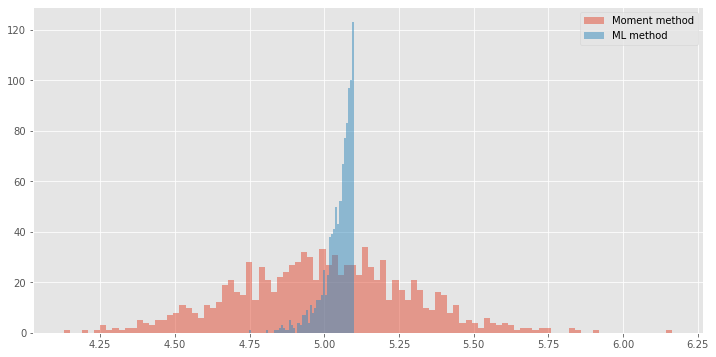

In [6]:
plt.figure(figsize=(12,6))
plt.hist(theta_1, bins=100, alpha=0.5, label='Moment method')
plt.hist(theta_2, bins=50, alpha=0.5, label='ML method')
plt.legend();

In [7]:
# Видим, что у оценки максимального правдоподобия разброс оказался меньше.  
np.var(theta_1), np.var(theta_2)

(0.08458585642843422, 0.0025040212646750327)

На практике следовало бы выбрать её. Когда у оценки самый маленький разброс в каком-то классе (например, в классе несмещённых оценок), её называют __эффективной__ в этом классе. 

Кстати говоря, для оценок из этого упражнения, можно руками выяснить, что: 

$$ E(\hat \theta_{MM} - \theta)^2 = \frac{\theta^2}{3n} \qquad \qquad E(\hat \theta_{ML} - \theta)^2 = \frac{2 \theta^2}{n(n+1)}.$$

Получится, что при $n = 1,2$ дисперсии совпадут. При $n >2$ оценка максимального правдоподобия будет обладать меньшей дисперсией. Вывод этих формул руками можно посмотреть в [книге Черновой](https://nsu.ru/mmf/tvims/chernova/ms/ms_nsu07.pdf) на странице 33 (Пример 13).

### Matstat scheme

In [8]:
# confidence interval
norm_rv = sts.norm(loc = 0, scale = 1)  # norm distribution generator

alpha = 0.1
mu = 5
se = 1.5

left = mu - norm_rv.ppf(1 - alpha/2)*se
right = mu + norm_rv.ppf(1 - alpha/2)*se

delta = right - left

left, right, delta

(2.532719559572792, 7.467280440427208, 4.934560880854416)

In [9]:
# probability for Poisson distribution

# вероятность того, что Пуассоновская случайная величина примет какое-то значение, mu - оценка lambda для Poisson distribution
def poiss_prob(mu, k):
    return np.power(mu, k) / np.math.factorial(k) * np.exp(-mu) 


poiss_prob(5, 1) # point estimate of probability that event would occur 1 time

0.03368973499542734

### Delta-method
source: https://github.com/bdemeshev/pr201/tree/master/delta_method

Дельта-метод основан на том факте, что даже нелинейная функция от нормально распределенной случайной величины иногда имеет распределение близкое к нормальному.

Если функция $g(t)$ дифференцируема, то в окрестности точки $ \mu$ функция $g(t)$ похожа на прямую, то есть: <br/>
$$ g(t)\approx g(\mu) + g'(\mu)*(t-\mu) $$

Линейное преобразование нормально распределенной случайной величины оставляет её нор- мально распределенной, если угловой коэффициент отличен от нуля, т.е. <br/>
$$ g'(\mu) \neq 0 $$

Если $X \sim N(\mu, \sigma^2) $ и дисперсия X мала, то X практически всегда попадает в небольшую окрестность $ \mu$, а в ней $f$ похожа на линейную функцию и <br/>
$$ g(X) \approx N(\mu, \sigma^2(g'(\mu))^2)$$

Практическая версия дельта-метода: <br/>
* $g(t)$ - дифференциируема
* $g'(\mu) \neq 0 $ 
* $X \sim N(\mu, \sigma^2)$
* дисперсия $\sigma^2$ мала <br/>
$$ g(X) \approx N(g(\mu), \sigma^2(g'(\mu))^2)$$

ЗБЧ позволяет использовать средние в качестве оценок для различных параметров. ЦПТ под- сказывает как среднее будет распределено. Однако на практике часто встречаются ситуации, ко- гда оценка параметра — это функция от среднего. *Дельта-метод* — позволяет в такой ситуации понять как будет распределена оценка. Полученное распределение можно использовать для стро- ительства доверительного интервала.

In [10]:

# using delta-method for confidence interval for poisson point estimate

alpha = 0.05
k = 1

mu = 5
k = 1
n = 10

# exmaple with exponential distribution
def g(mu, k):
    return np.power(mu, k) / np.math.factorial(k) * np.exp(-mu) 

def g_diff(mu, k):
    e_1 = np.exp(-mu)
    return e_1 * np.power(mu,(k-1)) * (k - mu)/np.math.factorial(k)


left = g(mu, k) - sts.norm.ppf(1 - alpha / 2) * np.sqrt(mu / n * np.power(g_diff(mu, k),2))
right = g(mu, k) + sts.norm.ppf(1 - alpha / 2) * np.sqrt(mu / n * np.power(g_diff(mu, k),2))
delta = right - left

left, right, delta

(-0.003662851061764602, 0.07104232105261928, 0.07470517211438388)